In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pymongo import MongoClient
from pandas.plotting import scatter_matrix
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
df = pd.read_json('/Users/kellypeng/Desktop/dsi-fraud_detection_case_study/files/data.json')

In [4]:
df['fraud'] = df['acct_type'].apply(lambda x: True  if 'fraud' in str(x) else False)

In [136]:
df['user_created'] = pd.to_datetime(df['user_created'], unit='s')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 45 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [6]:
df.isnull().sum()

acct_type                0
approx_payout_date       0
body_length              0
channels                 0
country                 81
currency                 0
delivery_method         16
description              0
email_domain             0
event_created            0
event_end                0
event_published         99
event_start              0
fb_published             0
gts                      0
has_analytics            0
has_header            5409
has_logo                 0
listed                   0
name                     0
name_length              0
num_order                0
num_payouts              0
object_id                0
org_desc                 0
org_facebook            59
org_name                 0
org_twitter             59
payee_name               0
payout_type              0
previous_payouts         0
sale_duration          155
sale_duration2           0
show_map                 0
ticket_types             0
user_age                 0
user_created             0
u

In [12]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{u'name': u'RUF', u'created': u'2010-10-01 01...",28.0,28,0,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{u'name': u'Danielle Severn', u'created': u'2...",54.0,54,0,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{u'name': u'', u'created': u'2010-11-09 01:10...",0.0,0,0,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,1283870102,3,,None,NaN,NaN,None,None,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{u'name': u'Arts and Business Council or Grea...,63.0,63,0,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False


In [7]:
def feature_eng():
    df['fraud'] = df['acct_type'].apply(lambda x: True  if 'fraud' in str(x) else False)
    df['twitter_presence'] = df['org_twitter'].apply(lambda x: 1 if x > 5 else 0)
    df['facebook_presence'] = df['org_facebook'].apply(lambda x: 1 if x > 5 else 0)
    return df

In [8]:
def fit_logit(y, X):
    logit = Logit(y_train, X_train)
    model = logit.fit()
    return model

In [9]:
feature_eng() # feature engineering

y = df['fraud']
# X = df[['body_length', 'sale_duration2', 'user_age']]
X = df[['body_length', 'sale_duration2', 'user_age', 'twitter_presence', 'facebook_presence']]
X['constant'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
model = fit_logit(y_train, X_train)
model.summary()

Optimization terminated successfully.
         Current function value: 0.198050
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  fraud   No. Observations:                10752
Model:                          Logit   Df Residuals:                    10746
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Aug 2017   Pseudo R-squ.:                  0.3451
Time:                        14:14:46   Log-Likelihood:                -2129.4
converged:                       True   LL-Null:                       -3251.3
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
body_length          -0.0002   1.88e-05     -8.181      0.000      -0.000      -0.000
sale_duration2       -0.0332      0.002    -17.230      0.000      -0.037      -0.029
user_age             -0.0031      0.000    -15.528      0.000      -0.004      -0.003
twitter_presence     -1.5749      0.242     -6.498      0.000      -2.050      -1.100
facebook_presence    -1.7259      0.176     -9.812      0.000      -2.071      -1.381
constant              0.2222      0.065      3.433      0.001       0.095       0.349
=====================================================================================
"""

In [54]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,twitter_presence,facebook_presence
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True,0,0
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{u'name': u'RUF', u'created': u'2010-10-01 01...",28.0,28,0,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False,1,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{u'name': u'Danielle Severn', u'created': u'2...",54.0,54,0,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False,0,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{u'name': u'', u'created': u'2010-11-09 01:10...",0.0,0,0,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,1283870102,3,,None,NaN,NaN,None,None,False,0,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{u'name': u'Arts and Business Council or Grea...,63.0,63,0,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False,0,0


In [83]:
df['fraud'].value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

In [56]:
df.groupby(['fraud']).mean()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude,twitter_presence,facebook_presence
fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1.351254e+09,3886.994557,6.377645,0.475537,1.345874e+09,1.350822e+09,1.342905e+09,1.350545e+09,0.137841,2481.679602,0.079960,0.210251,0.861546,42.784575,30.338163,37.041398,4.514623e+06,8.633206,4.687960,49.827631,53.950245,0.852883,402.683073,1.311082e+09,2.819304,35.165770,-60.693062,0.382858,0.464198
True,1.347687e+09,1508.886311,4.149265,0.073380,1.345333e+09,1.347255e+09,1.318542e+09,1.346777e+09,0.022428,1911.214362,0.003094,0.069364,0.645785,29.975251,4.530549,0.582367,4.700036e+06,1.035541,0.294023,14.125957,16.544470,0.756381,87.152359,1.337804e+09,1.619490,35.969856,-43.413620,0.021655,0.048724


In [63]:
# investigate previous_payout
previous_true = df['previous_payouts'][(df['fraud'] == True)]

0                                                       []
26                                                      []
51       [{u'name': u'Royal Princesses and Knights', u'...
54                                                      []
70                                                      []
128                                                     []
130      [{u'name': u'Global Gas Card', u'created': u'2...
131      [{u'name': u'', u'created': u'2012-03-16 03:13...
140      [{u'name': u'Global Gas Card', u'created': u'2...
144                                                     []
149      [{u'name': u'', u'created': u'2012-05-09 03:21...
161                                                     []
177                                                     []
181                                                     []
183                                                     []
187                                                     []
202                                                     

In [125]:
df['previous_payouts'][(df['fraud'] == False)]

1        [{u'name': u'RUF', u'created': u'2010-10-01 01...
2        [{u'name': u'Danielle Severn', u'created': u'2...
3        [{u'name': u'', u'created': u'2010-11-09 01:10...
4        [{u'name': u'Arts and Business Council or Grea...
5        [{u'name': u'Bluegrass Stallions', u'created':...
6        [{u'name': u'', u'created': u'2011-01-12 01:12...
7        [{u'name': u'', u'created': u'2011-01-25 01:12...
8        [{u'name': u'', u'created': u'2011-02-19 01:12...
9        [{u'name': u'', u'created': u'2011-01-25 01:12...
10       [{u'name': u'San Francisco Family Support Netw...
11       [{u'name': u'', u'created': u'2010-09-22 01:10...
12       [{u'name': u'DG Group, LLC', u'created': u'201...
13       [{u'name': u'CCICE', u'created': u'2010-03-14 ...
14       [{u'name': u'Simply Inc.', u'created': u'2010-...
15       [{u'name': u'Reel Link Films', u'created': u'2...
16       [{u'name': u'Reel Link Films', u'created': u'2...
17       [{u'name': u'Friends of South Berwick Library'.

In [104]:
df[['previous_payouts', 'num_payouts']][(df['fraud'] == True)]

,previous_payouts,num_payouts
0,[],0
26,[],0
51,"[{u'name': u'Royal Princesses and Knights', u'...",1
54,[],0
70,[],0
128,[],0
130,"[{u'name': u'Global Gas Card', u'created': u'2...",11
131,"[{u'name': u'', u'created': u'2012-03-16 03:13...",0
140,"[{u'name': u'Global Gas Card', u'created': u'2...",21
144,[],0


In [122]:
df['num_payouts'][df['previous_payouts'].str.len() == 0].value_counts()

0    1080
Name: num_payouts, dtype: int64

In [128]:
df['num_payouts'][df['fraud'] == True].value_counts()

0     1154
1       55
2       18
3       18
7       11
5        5
6        4
29       4
4        3
11       3
9        3
23       2
19       1
21       1
27       1
26       1
22       1
8        1
20       1
18       1
12       1
28       1
16       1
17       1
14       1
Name: num_payouts, dtype: int64

In [126]:
df['previous_payouts'].str.len()[(df['num_payouts'] == 0) & (df['fraud'] == True)].value_counts()

0     998
1      90
3      16
2      16
24     14
10      3
6       3
32      2
12      2
9       2
7       2
5       2
22      1
21      1
18      1
11      1
Name: previous_payouts, dtype: int64

In [76]:
# check where sale_duration is NaN
df[(df['sale_duration'].isnull() == True)]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,twitter_presence,facebook_presence
219,fraudster_event,1348916400,0,11,US,USD,0.0,,gmail.com,1346730451,1348484400,NaN,1348416000,0,0.00,0,NaN,1,y,Copy of RELATIONSHIP REVELATION CONFERENCE,42,0,0,4260346,,10.0,Live Oak MBC,0.0,,,[],NaN,20,1,"[{u'event_id': 4260346, u'cost': 10.0, u'avail...",7,1346118291,1,526 E Hospital St,US,31.603631,-94.650802,Live Oak MIssionary Baptist Church,TX,True,0,1
289,fraudster_event,1359676800,0,0,MY,USD,0.0,,aol.com,1355785018,1359244800,NaN,1359234000,0,0.00,0,NaN,0,y,,0,0,0,5046800,,0.0,Rob,0.0,,,[],NaN,40,1,[],9,1354962353,1,,None,NaN,NaN,None,None,True,0,0
457,fraudster_event,1377061200,0,0,MA,USD,0.0,,hotmail.fr,1373135272,1376629200,NaN,1376618400,0,0.00,0,NaN,0,y,,0,0,0,7342241,"<p>I am a student of game development, I am pu...",0.0,Anshul Soni,0.0,,,[],NaN,40,1,[],2,1372969091,3,,None,NaN,NaN,None,None,True,0,0
500,fraudster,1207375200,2264,0,GB,GBP,NaN,<p>\r\nLIDF Sunday at the Roxy - Part 2\r\n</p...,lidf.co.uk,1205532634,1206943200,NaN,1206927000,0,0.00,0,0.0,1,y,LIDF Sunday at the Roxy - Part 2,32,0,0,104011,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,,,[],NaN,16,1,"[{u'event_id': 104011, u'cost': 5.0, u'availab...",686,1146260369,3,128-132 Borough High Street,GB,51.502767,-0.092569,Roxy Bar and Screen,Greater London,True,0,0
501,fraudster,1207447200,1019,0,GB,GBP,NaN,<p>\r\n<strong>Aboriginal Rules</strong><br />...,lidf.co.uk,1205532859,1207015200,NaN,1207011600,0,0.00,0,0.0,1,y,Aboriginal Rules,16,0,0,104013,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,,,[],NaN,17,1,"[{u'event_id': 104013, u'cost': 5.0, u'availab...",686,1146260369,3,128-132 Borough High Street,GB,51.502767,-0.092569,Roxy Bar and Screen,Greater London,True,0,0
749,fraudster_event,1352806200,911,5,CA,USD,0.0,"<p style=""text-align: justify;""><strong>twice ...",yahoo.com,1352091465,1352374200,NaN,1352354400,0,0.00,0,NaN,0,y,TWICE AS NICE(The Virgo Reunion Bash),37,0,0,4751583,<p><strong>Twice as nice </strong>is an event ...,0.0,Afro Entertainment,0.0,,,[],NaN,3,1,[],0,1352091463,1,1129 Valley Rd,US,40.864951,-74.192820,Macaluso's,NJ,True,0,0
770,fraudster_event,1361145600,4970,5,CA,USD,0.0,"<p><span style=""font-family: arial black,avant...",diversity-church.com,1357229327,1360713600,NaN,1360702800,0,0.00,0,0.0,1,y,Kylie Morgan ~ Blow The Whistle On Bullying ~ ...,209,0,0,4982536,"<p><a href=""http://www.blowthewhistleonbullyin...",0.0,Blow The Whistle On Bullying ~ It Matters What...,0.0,,,[],NaN,40,1,"[{u'event_id': 4982536, u'cost': 3.0, u'availa...",186,1341189473,1,Blow The Whistle On Bullying ~ It Matters Wha...,,0.000000,0.000000,Blow The Whistle On Bullying ~ It Matters What...,,True,0,0
835,premium,1366930800,0,0,US,USD,0.0,,aol.com,1363014311,1366498800,NaN,1366488000,0,0.00,0,NaN,1,y,,0,0,0,5682662,"<p> </p>\r\n<p class=""MsoNormal"" style=""margin...",0.0,Head and Heart Philanthropy & National Basketb...,0.0,,,[],NaN,40,1,[],872,1287682056,3,,None,NaN,NaN,None,None,False,0,0
846,premium,1367811000,4945,8,US,USD,1.0,"<div style=""font-family: 'Helvetica Neue', Hel...",savings.com,1363708393,1367379000,0.0,1367371800,0,270.00,0,0.0,0,y,"West Palm Beach, FL Drugstore Saving Secrets W...",53,35,65,5899261,,7.0,Savings Nation,8.0,,ACH,"[{u'name': u'', u'created': u'2012-04-04 03:12...",NaN,42,1,"[{u'event_id': 5899261, u'cost': 4.47, u'avail...",385,1330452900,3,2751 S Dixie Hwy,US,26.688827,-80.055183,The Palm Beach Post - Auditorium,FL,

In [82]:
# if an event is fraud, then there's higher chance it is a fraud
df['fraud'][(df['sale_duration'].isnull() == True)].value_counts()

True     118
False     37
Name: fraud, dtype: int64

In [90]:
df['show_map'][(df['fraud'] == True)].value_counts()
#df['show_map'][(df['fraud'] == False)].value_counts()

1    978
0    315
Name: show_map, dtype: int64

In [93]:
df['fraud'][(df['ticket_types'].isnull() == True)].value_counts()

Series([], Name: fraud, dtype: int64)

In [102]:
len(df['ticket_types'][3])

6

In [134]:
x = df['ticket_types'][(df['fraud'] == True)]
x
# len(x[0])

0        [{u'event_id': 527017, u'cost': 25.0, u'availa...
26       [{u'event_id': 1386643, u'cost': 300.0, u'avai...
51       [{u'event_id': 1928009, u'cost': 30.0, u'avail...
54       [{u'event_id': 1964043, u'cost': 500.0, u'avai...
70       [{u'event_id': 2228484, u'cost': 30.0, u'avail...
128      [{u'event_id': 3048157, u'cost': 150.0, u'avai...
130      [{u'event_id': 3090085, u'cost': 140.76, u'ava...
131      [{u'event_id': 3104463, u'cost': 200.0, u'avai...
140      [{u'event_id': 3244275, u'cost': 140.76, u'ava...
144      [{u'event_id': 3310151, u'cost': 235.0, u'avai...
149      [{u'event_id': 3423729, u'cost': 35.0, u'avail...
161      [{u'event_id': 3493645, u'cost': 8.46, u'avail...
177      [{u'event_id': 3717486, u'cost': 100.0, u'avai...
181      [{u'event_id': 3798244, u'cost': 22.0, u'avail...
183      [{u'event_id': 3801364, u'cost': 350.0, u'avai...
187      [{u'event_id': 3833884, u'cost': 2.0, u'availa...
202      [{u'event_id': 3998400, u'cost': 100.0, u'avai.

In [150]:
# Mean number of ticket types for fraud events: 
x = df['ticket_types'][(df['fraud'] == True)]

fraud = []
for t in x:
    fraud.append(len(t))
print 'mean', sum(fraud)/float(len(fraud))
print 'min:', min(fraud)
print 'max', max(fraud)

mean 1.73008507347
min: 0
max 61


In [151]:
# Mean number of ticket types for non-fraud events: 
x = df['ticket_types'][(df['fraud'] == False)]

non_fraud = []
for t in x:
    non_fraud.append(len(t))
print 'mean', sum(non_fraud)/float(len(non_fraud))
print 'min:', min(non_fraud)
print 'max', max(non_fraud)

mean 2.78994173566
min: 0
max 116


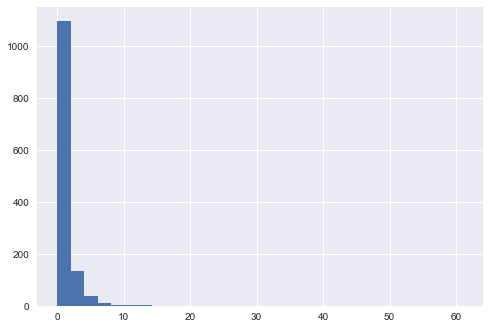

In [152]:
plt.hist(fraud, bins=30)
plt.show()

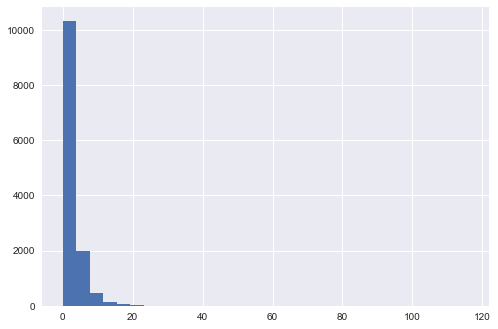

In [153]:
plt.hist(non_fraud, bins=30)
plt.show()

In [158]:
print df['user_age'].min()
print df['user_age'].max()
print df['user_age'].mean()

0
3794
374.226546697


In [160]:
print df['user_age'][(df['fraud'] == False)].min()
print df['user_age'][(df['fraud'] == False)].max()
print df['user_age'][(df['fraud'] == False)].mean()

0
3794
402.683072677


In [159]:
print df['user_age'][(df['fraud'] == True)].min()
print df['user_age'][(df['fraud'] == True)].max()
print df['user_age'][(df['fraud'] == True)].mean()

0
2207
87.1523588554


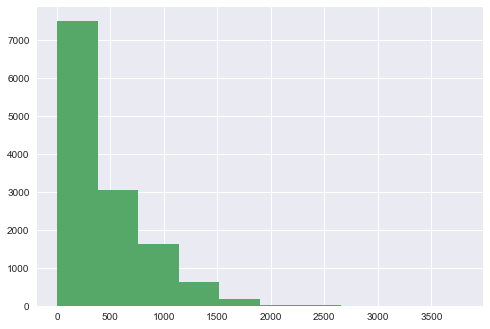

In [155]:
df['user_age'][(df['fraud'] == False)].hist()
plt.show()

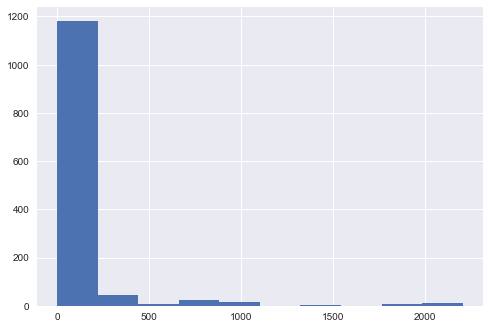

In [156]:
df['user_age'][(df['fraud'] == True)].hist()
plt.show()

In [13]:
df['user_type'][(df['fraud'] == True)].value_counts()

1    928
3    295
4     66
5      3
2      1
Name: user_type, dtype: int64

In [14]:
df['user_type'][(df['fraud'] == False)].value_counts()

3      7225
4      2951
1      2810
5        56
103       2
Name: user_type, dtype: int64

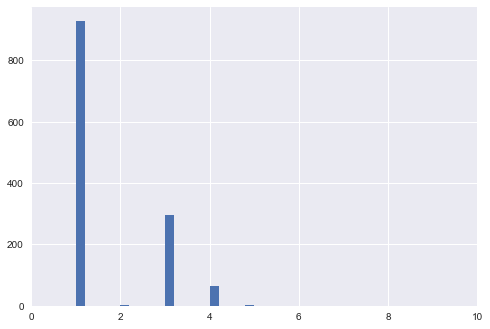

In [20]:
df['user_type'][(df['fraud'] == True)].hist(bins=20)
plt.xlim(0,10)
plt.show()

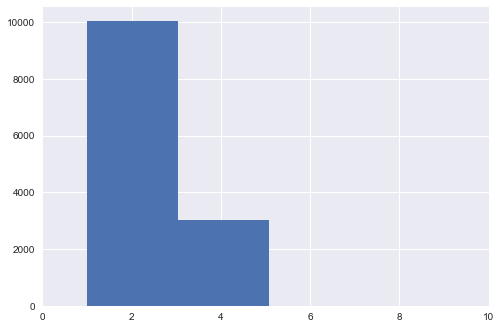

In [21]:
plt.clf()
df['user_type'][(df['fraud'] == False)].hist(bins=50)
plt.xlim(0,10)
plt.show()

In [ ]:
df['venue_country']

In [56]:
df[['venue_state', 'fraud']].groupby(['venue_state', 'fraud']).agg({'fraud':'count'})#.plot.bar()

fraud
venue_state                                        fraud       
                                                   False   2492
                                                   True     133
AB                                                 False     78
ACT                                                False     10
AK                                                 False      9
                                                   True       3
AL                                                 False     46
                                                   True       5
ALAKSA                                             False      1
AR                                                 False     23
                                                   True       2
AUSTRALIA                                          False      1
AZ                                                 False    112
                                                   True       7
Aberdeen City                                      False      1
Abu Dhabi                                          True       2
Ad Dawhah                                          False      1
Aguada                                             False      1
Alberta                                            False     72
Algiers                                            True       1
Alsace                                             False      1
Antrim                                             False      1
Antwerpen                                          False      2
Auckland                                           False     26
Australian Capital Territory                       False      6
Auvergne                                           False      1
BA                                                 True       2
BC                                                 False    108
BW                                                 False      5
BY                                                 False      2
Bali                                               False      2
                                                   True       1
Bath And North East Somerset                       False      1
Bath and North East Somerset                       False      5
Bay Of Plenty                                      False      2
Bayern                                             False      3
Bedfordshire                                       True       2
Beds                                               False      2
Beijing                                            False      1
Belfast                                            False     11
                                                   True       1
Belgravia                                          False      1
Berkshire                                          False      2
Berlin                                             False      7
                                                   True       3
Birmingham                                         False     19
                                                   True       3
Blackpool                                          False      1
                                                   True       1
Bournemouth                                        False      7
Bracknell Forest                                   False      1
Bradford                                           False      6
Brighton And Hove                                  False      2
Bristol, City Of                                   False      6
                                                   True       3
British Columbia                                   False    142
Brussels                                           False      3
Brussels Hoofdstedelijk Gewest                     False      1
Bruxelles                                          False      3
Buckinghamshire                                    False      3
Budapest                                           False      2
Burgandy                  

In [73]:
df[df['fraud'] == True].count()[0]

1293

In [166]:
df['acct_type'].groupby(df['venue_state']).count()

venue_state
                                                      2625
AB                                                      78
ACT                                                     10
AK                                                      12
AL                                                      51
ALAKSA                                                   1
AR                                                      25
AUSTRALIA                                                1
AZ                                                     119
Aberdeen City                                            1
Abu Dhabi                                                2
Ad Dawhah                                                1
Aguada                                                   1
Alberta                                                 72
Algiers                                                  1
Alsace                                                   1
Antrim                                      

In [170]:
# % of frauds in each state
(df['venue_state'][(df['fraud'] == True) & (df['venue_country'] == 'US')].value_counts()\
 / df['acct_type'].groupby(df['venue_state']).count()).sort_values(ascending=False)

Florida                                               1.000000
NEW SOUTH WALES                                       1.000000
MT                                                    0.285714
Mt                                                    0.250000
AK                                                    0.250000
FL                                                    0.216749
DE                                                    0.150000
NM                                                    0.142857
PA                                                    0.119048
NV                                                    0.117647
GA                                                    0.107296
AL                                                    0.098039
HI                                                    0.093750
NY                                                    0.091864
NJ                                                    0.088608
AR                                                    0

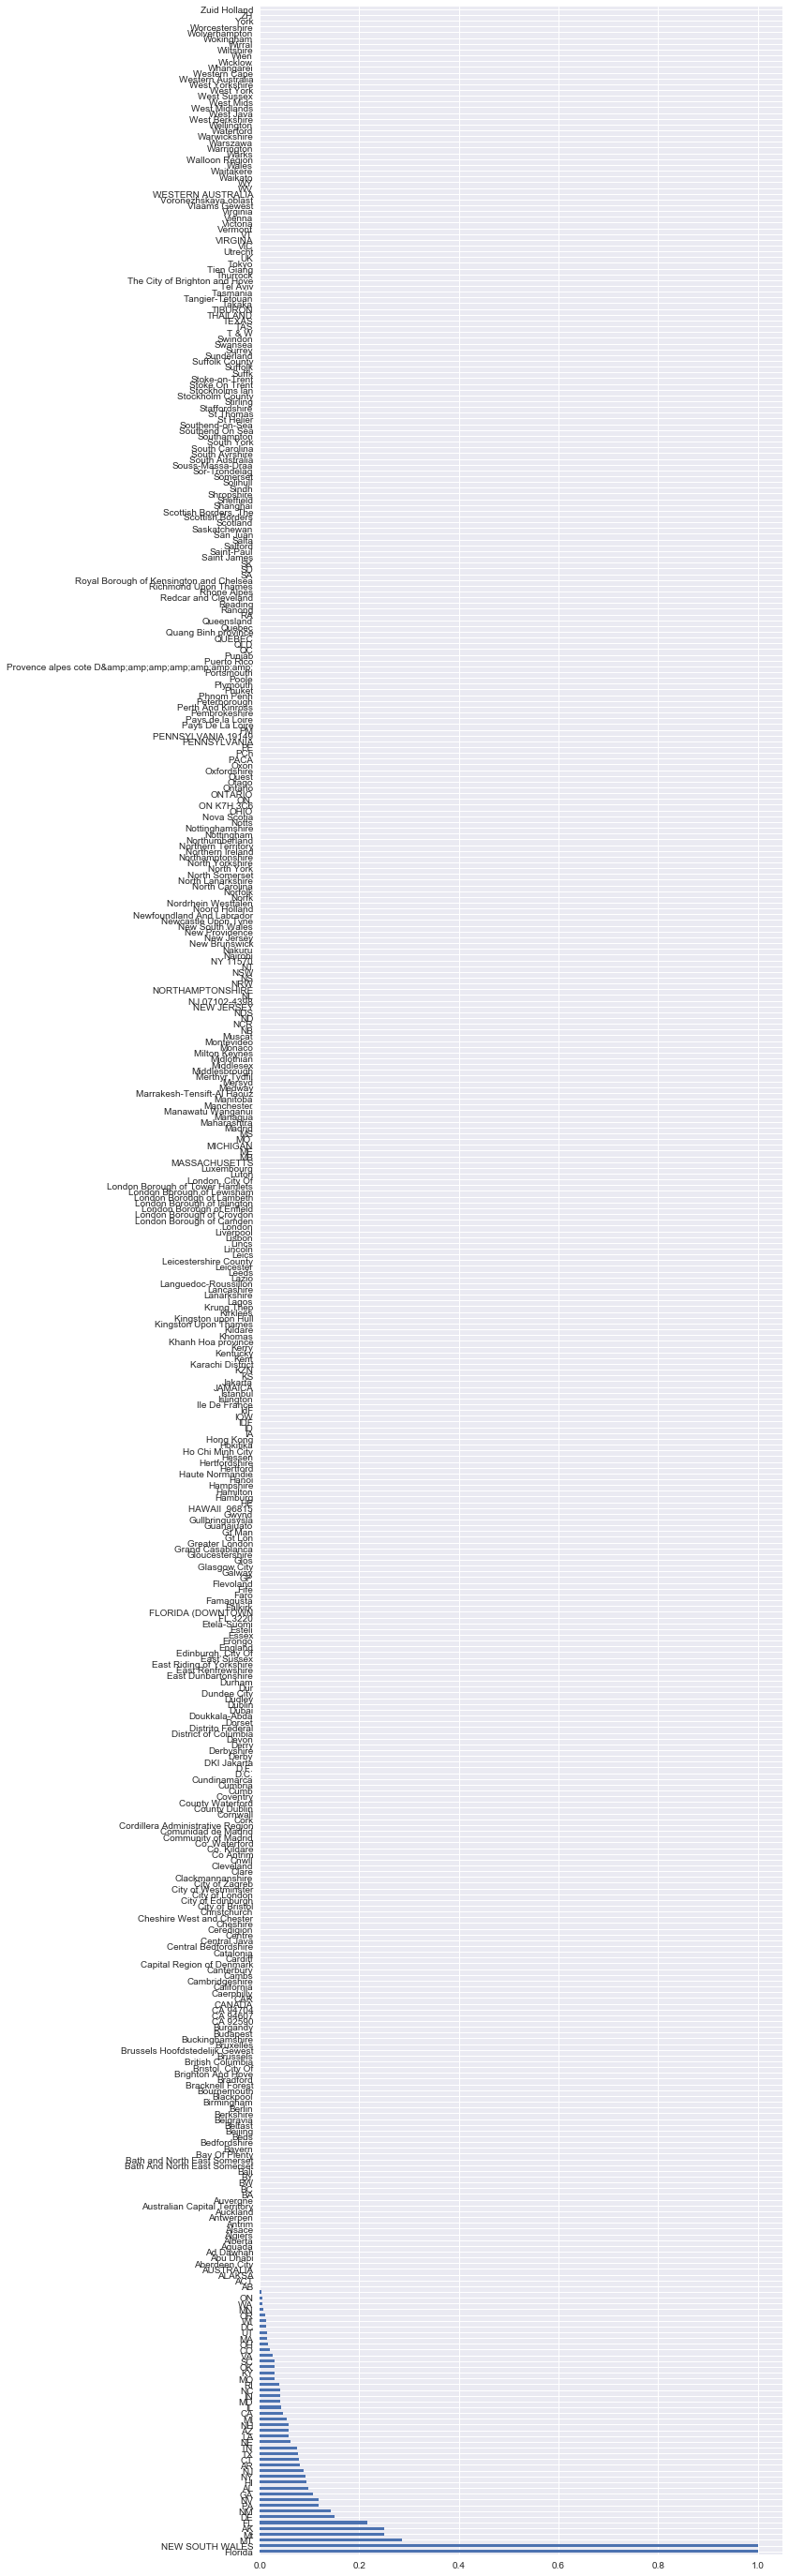

In [187]:
# % of frauds in each state

(df['venue_state'][(df['fraud'] == True) & (df['venue_country'] == 'US')].value_counts()\
 / df['acct_type'].groupby(df['venue_state']).count()).sort_values(ascending=False).plot.barh(figsize=(10,50))

plt.show()

In [171]:
# % of non-frauds in each state
(df['venue_state'][(df['fraud'] == False) & (df['venue_country'] == 'US')].value_counts() \
 / df['acct_type'].groupby(df['venue_state']).count()).sort_values(ascending=False)

WY                                                    1.000000
HAWAII  96815                                         1.000000
ON K7H 3C6                                            1.000000
ALAKSA                                                1.000000
JAMAICA                                               1.000000
North Carolina                                        1.000000
New Jersey                                            1.000000
NY 11570                                              1.000000
District of Columbia                                  1.000000
FL 3220                                               1.000000
NORTHAMPTONSHIRE                                      1.000000
FLORIDA (DOWNTOWN                                     1.000000
NJ 07102-4398                                         1.000000
IA                                                    1.000000
ONTARIO                                               1.000000
NEW JERSEY                                            1

In [91]:
# venue country v.s. fraud, definitely a signal
df['venue_country'][(df['fraud'] == False)].value_counts() /df[df['fraud'] == False].count()[0]

US    0.603113
GB    0.123812
CA    0.085480
      0.059568
AU    0.051595
NZ    0.003833
IE    0.003373
FR    0.002913
DE    0.002147
NL    0.002147
ES    0.001533
BE    0.001150
AR    0.000383
PR    0.000383
AT    0.000307
PL    0.000230
BS    0.000230
HU    0.000230
ID    0.000230
SG    0.000230
TH    0.000153
AE    0.000153
ZA    0.000153
IN    0.000153
PT    0.000153
NI    0.000153
CN    0.000153
LU    0.000077
SE    0.000077
SK    0.000077
HT    0.000077
FI    0.000077
TR    0.000077
MX    0.000077
MY    0.000077
MC    0.000077
RE    0.000077
JM    0.000077
DO    0.000077
TT    0.000077
QA    0.000077
JP    0.000077
HR    0.000077
NO    0.000077
CZ    0.000077
UY    0.000077
IS    0.000077
IL    0.000077
HK    0.000077
BG    0.000077
BR    0.000077
VI    0.000077
Name: venue_country, dtype: float64

In [92]:
df['venue_country'][(df['fraud'] == True)].value_counts() /df[df['fraud'] == True].count()[0]

US    0.362722
GB    0.172467
      0.076566
CA    0.014695
MA    0.013921
PH    0.011601
FR    0.010828
AU    0.007734
DE    0.006187
ID    0.004640
VN    0.004640
AR    0.003094
AE    0.002320
PK    0.002320
KE    0.002320
NL    0.001547
NA    0.001547
ZA    0.001547
TR    0.001547
JE    0.000773
CM    0.000773
RU    0.000773
NG    0.000773
CO    0.000773
MX    0.000773
CY    0.000773
OM    0.000773
KH    0.000773
DK    0.000773
HR    0.000773
DZ    0.000773
TH    0.000773
IT    0.000773
SE    0.000773
Name: venue_country, dtype: float64

In [146]:
# % of fraud across states
df['venue_state'][(df['fraud'] == True) & (df['venue_country'] == 'US')].value_counts() \
/df[(df['fraud'] == True) & (df['venue_country'] == 'US')].count()[0]

FL                 0.187633
NY                 0.149254
CA                 0.136461
TX                 0.078891
GA                 0.053305
PA                 0.053305
IL                 0.031983
NJ                 0.029851
                   0.017058
NV                 0.017058
TN                 0.017058
MI                 0.017058
NC                 0.017058
MD                 0.014925
AZ                 0.014925
CT                 0.012793
LA                 0.010661
AL                 0.010661
IN                 0.010661
VA                 0.010661
MA                 0.008529
CO                 0.008529
Florida            0.008529
OH                 0.006397
DE                 0.006397
AK                 0.006397
HI                 0.006397
MO                 0.006397
DC                 0.004264
MT                 0.004264
NH                 0.004264
AR                 0.004264
NM                 0.004264
SC                 0.004264
RI                 0.002132
KY                 0

In [147]:
df['venue_state'][(df['fraud'] == False) & (df['venue_country'] == 'US')].value_counts() /df[(df['fraud'] == False) & (df['venue_country'] == 'US')].count()[0]

CA                      0.166773
                        0.134994
NY                      0.087962
TX                      0.057201
IL                      0.042837
FL                      0.040422
MA                      0.032414
GA                      0.026440
NC                      0.024024
CO                      0.023516
PA                      0.023516
VA                      0.023389
OH                      0.022626
MD                      0.020974
WA                      0.020465
DC                      0.019194
NJ                      0.018304
MI                      0.017796
MN                      0.016016
IN                      0.014999
AZ                      0.014237
TN                      0.012457
MO                      0.012203
OR                      0.012076
WI                      0.010296
LA                      0.010169
CT                      0.008389
SC                      0.008389
NV                      0.007627
UT                      0.006991
AL        

In [131]:
# create another column as 'have_previous_payouts' and 'highly_suspect_state'
df['have_previous_payouts'] = df['previous_payouts'].apply(lambda x: 1 if len(x) != 0 else 0)
df['highly_suspect_state'] = df['venue_state'].apply(lambda x: 1 if x in ['MT', 'Mt', 'AK', 'FL', 'NEW SOUTH WALES', 'Florida'] else 0)

In [189]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud,twitter_presence,facebook_presence,have_previous_pauouts,have_previous_payouts,highly_suspect_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,2009-11-30 20:45:50,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True,0,0,0,0,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{u'name': u'RUF', u'created': u'2010-10-01 01...",28.0,28,0,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,2010-08-04 17:26:16,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False,1,0,1,1,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{u'name': u'Danielle Severn', u'created': u'2...",54.0,54,0,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,2010-04-29 16:43:08,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False,0,0,1,1,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{u'name': u'', u'created': u'2010-11-09 01:10...",0.0,0,0,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,2010-09-07 14:35:02,3,,None,NaN,NaN,None,None,False,0,0,1,1,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{u'name': u'Arts and Business Council or Grea...,63.0,63,0,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,2010-11-05 19:07:45,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False,0,0,1,1,False


In [142]:
print df['user_created'][(df['fraud'] == True)].min()
print df['user_created'][(df['fraud'] == True)].max()

2006-04-28 21:39:29
2013-10-12 01:55:18


In [140]:
print df['user_created'][(df['fraud'] == False)].min()
print df['user_created'][(df['fraud'] == False)].max()

2002-01-16 19:47:22
2013-09-25 13:22:18


In [175]:
df[df['venue_state'] == 'Florida'].count()

acct_type                4
approx_payout_date       4
body_length              4
channels                 4
country                  4
currency                 4
delivery_method          4
description              4
email_domain             4
event_created            4
event_end                4
event_published          4
event_start              4
fb_published             4
gts                      4
has_analytics            4
has_header               3
has_logo                 4
listed                   4
name                     4
name_length              4
num_order                4
num_payouts              4
object_id                4
org_desc                 4
org_facebook             4
org_name                 4
org_twitter              4
payee_name               4
payout_type              4
previous_payouts         4
sale_duration            4
sale_duration2           4
show_map                 4
ticket_types             4
user_age                 4
user_created             4
u